In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/atar-filtered-data-liewave/S3S1.csv
/kaggle/input/atar-filtered-data-liewave/S3S2.csv
/kaggle/input/atar-filtered-data-liewave/S15S1.csv
/kaggle/input/atar-filtered-data-liewave/S5S2.csv
/kaggle/input/atar-filtered-data-liewave/S13S1.csv
/kaggle/input/atar-filtered-data-liewave/S11S1.csv
/kaggle/input/atar-filtered-data-liewave/S14S2.csv
/kaggle/input/atar-filtered-data-liewave/S5S1.csv
/kaggle/input/atar-filtered-data-liewave/S9S1.csv
/kaggle/input/atar-filtered-data-liewave/S20S2.csv
/kaggle/input/atar-filtered-data-liewave/S7S2.csv
/kaggle/input/atar-filtered-data-liewave/S7S1.csv
/kaggle/input/atar-filtered-data-liewave/S8S1.csv
/kaggle/input/atar-filtered-data-liewave/S16S1.csv
/kaggle/input/atar-filtered-data-liewave/S15S2.csv
/kaggle/input/atar-filtered-data-liewave/S16S2.csv
/kaggle/input/atar-filtered-data-liewave/S10S1.csv
/kaggle/input/atar-filtered-data-liewave/S4S2.csv
/kaggle/input/atar-filtered-data-liewave/S24S2.csv
/kaggle/input/atar-filtered-data-liewave

# **OSW , DWT , statistical methods over each signal**

In [32]:
import os
import pandas as pd
import pywt
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

def load_eeg_data(file_path):
    return pd.read_csv(file_path)

def sliding_window(data, window_size, step_size):
    num_windows = (len(data) - window_size) // step_size + 1
    windows = [data[i*step_size:i*step_size + window_size] for i in range(num_windows)]
    return windows

def apply_dwt_to_windows(windows, wavelet='db4'):
    dwt_windows = [pywt.wavedec(window, wavelet) for window in windows]
    return dwt_windows

def extract_statistical_features(dwt_windows):
    features = []
    for coeffs in dwt_windows:
        window_features = []
        for coeff in coeffs:
            feature = [
                np.min(coeff), np.max(coeff), np.mean(coeff), np.median(coeff),
                np.std(coeff), np.var(coeff), skew(coeff), kurtosis(coeff),
                np.sum(np.square(coeff)), np.sum(np.square(coeff)) / np.sum(np.square(coeffs[0]))
            ]
            window_features.append(feature)
        features.append(window_features)
    return features

def process_eeg_files(directory, window_size, step_size, wavelet='db4'):
    results = {}
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            file_path = os.path.join(directory, filename)
            data = load_eeg_data(file_path)
            dwt_results = {}
            for column in data.columns:
                channel_data = data[column].values
                windows = sliding_window(channel_data, window_size, step_size)
                dwt_windows = apply_dwt_to_windows(windows, wavelet)
                features = extract_statistical_features(dwt_windows)
                dwt_results[column] = features
            results[filename] = dwt_results
    return results

def print_feature_vectors_table(dwt_results, file_name, channel_name, window_index):
    if file_name not in dwt_results:
        print(f"File '{file_name}' not found in results.")
        return
    if channel_name not in dwt_results[file_name]:
        print(f"Channel '{channel_name}' not found in file '{file_name}'.")
        return
    if window_index >= len(dwt_results[file_name][channel_name]):
        print(f"Window index '{window_index}' out of range for channel '{channel_name}' in file '{file_name}'.")
        return

    features = dwt_results[file_name][channel_name][window_index]

    print(f"File: {file_name}, Channel: {channel_name}, Window Index: {window_index}")
    print("Feature Vectors:")
    print("Level\tMin\tMax\tMean\tMedian\tStd Dev\tVar\tSkewness\tKurtosis\tEnergy\tRelative Energy")
    for level, feature in enumerate(features):
        print(f"{level}\t{feature[0]:.4f}\t{feature[1]:.4f}\t{feature[2]:.4f}\t{feature[3]:.4f}\t{feature[4]:.4f}\t{feature[5]:.4f}\t{feature[6]:.4f}\t{feature[7]:.4f}\t{feature[8]:.4f}\t{feature[9]:.4f}")


directory = '/kaggle/input/atar-filtered-data-liewave'
window_size = 384
step_size = 32
wavelet = 'db4'

dwt_results = process_eeg_files(directory, window_size, step_size, wavelet)



# **Print features**

In [5]:
# Visualize the results for one file, channel, and window
file_name = 'S1S2.csv'
channel_name = 'EEG.T7'
window_index = 2

print_feature_vectors_table(dwt_results, file_name, channel_name, window_index)


File: S1S2.csv, Channel: EEG.T7, Window Index: 2
Feature Vectors:
Level	Min	Max	Mean	Median	Std Dev	Var	Skewness	Kurtosis	Energy	Relative Energy
0	-91.1301	45.2238	-15.2942	-26.5607	39.3827	1550.9938	0.0767	-1.0977	32128.3311	1.0000
1	-42.6556	47.6812	1.2434	-1.6859	24.4355	597.0951	0.1996	-0.7708	10775.5382	0.3354
2	-38.8104	18.9721	-2.9475	-1.4004	13.2625	175.8945	-0.6286	0.2357	5537.4699	0.1724
3	-14.8692	20.4926	-0.1714	-0.3168	8.4979	72.2135	0.1546	-0.4165	3901.1170	0.1214
4	-23.3639	15.6757	-0.8461	0.4555	7.9080	62.5369	-0.5677	0.2637	6388.5265	0.1988
5	-11.0692	11.7363	0.0041	0.0100	4.0250	16.2002	-0.0230	-0.1745	3159.0483	0.0983


# **Prepare and split the data**

In [6]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def prepare_data(dwt_results):
    # List to store all feature vectors and corresponding labels
    all_features = []
    all_labels = []
    
    for file_name, channels in dwt_results.items():
        # Determine the label from the file name
        label = 1 if file_name.endswith('2.csv') else 0
        for channel, features in channels.items():
            for window_features in features:
                all_features.append(window_features)
                all_labels.append(label)
    
    # Convert lists to numpy arrays
    all_features = np.array(all_features)
    all_labels = np.array(all_labels)
    
    # Split the data into training, validation, and testing sets
    X_train, X_temp, y_train, y_temp = train_test_split(all_features, all_labels, test_size=0.4, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
    
    return X_train, X_val, X_test, y_train, y_val, y_test


X_train, X_val, X_test, y_train, y_val, y_test = prepare_data(dwt_results)


# **LSTM model**

In [7]:
import os
import pandas as pd
import numpy as np
import pywt
from scipy.stats import skew, kurtosis
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
# Reshape the data for LSTM input
X_train = X_train.reshape((X_train.shape[0], -1, 1))
X_val = X_val.reshape((X_val.shape[0], -1, 1))
X_test = X_test.reshape((X_test.shape[0], -1, 1))

# Define the LSTM model
model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

# Optionally, evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 74s 48ms/step - accuracy: 0.5048 - loss: 0.6957 - val_accuracy: 0.5079 - val_loss: 0.6929
Epoch 2/10
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 69s 47ms/step - accuracy: 0.5229 - loss: 0.6920 - val_accuracy: 0.5093 - val_loss: 0.6924
Epoch 3/10
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 70s 48ms/step - accuracy: 0.5206 - loss: 0.6919 - val_accuracy: 0.5132 - val_loss: 0.6932
Epoch 4/10
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 70s 48ms/step - accuracy: 0.5218 - loss: 0.6911 - val_accuracy: 0.5436 - val_loss: 0.6901
Epoch 5/10
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 70s 48ms/step - accuracy: 0.5285 - loss: 0.6900 - val_accuracy: 0.5272 - val_loss: 0.6892
Epoch 6/10
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 69s 47ms/step - accuracy: 0.5471 - loss: 0.6859 - val_accuracy: 0.5425 - val_loss: 0.6863
Epoch 7/10
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 69s 47ms/step - accuracy: 0.5440 - loss: 0.6857 - val_accuracy: 0.5486 - val_loss: 0.6862
Epoch 8/10
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 70s 48ms/step - accuracy: 0.5536 -

# **Plot the model accuracy and model loss**

Epoch 1/10
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 69s 47ms/step - accuracy: 0.5699 - loss: 0.6741 - val_accuracy: 0.5659 - val_loss: 0.6785
Epoch 2/10
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 69s 47ms/step - accuracy: 0.5734 - loss: 0.6721 - val_accuracy: 0.5702 - val_loss: 0.6740
Epoch 3/10
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 69s 47ms/step - accuracy: 0.5799 - loss: 0.6666 - val_accuracy: 0.5814 - val_loss: 0.6681
Epoch 4/10
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 69s 47ms/step - accuracy: 0.5905 - loss: 0.6614 - val_accuracy: 0.5831 - val_loss: 0.6634
Epoch 5/10
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 69s 47ms/step - accuracy: 0.5944 - loss: 0.6582 - val_accuracy: 0.5880 - val_loss: 0.6620
Epoch 6/10
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 69s 47ms/step - accuracy: 0.5982 - loss: 0.6533 - val_accuracy: 0.5945 - val_loss: 0.6589
Epoch 7/10
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 69s 47ms/step - accuracy: 0.6033 - loss: 0.6516 - val_accuracy: 0.5988 - val_loss: 0.6571
Epoch 8/10
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 69s 47ms/step - accuracy: 0.6177 -

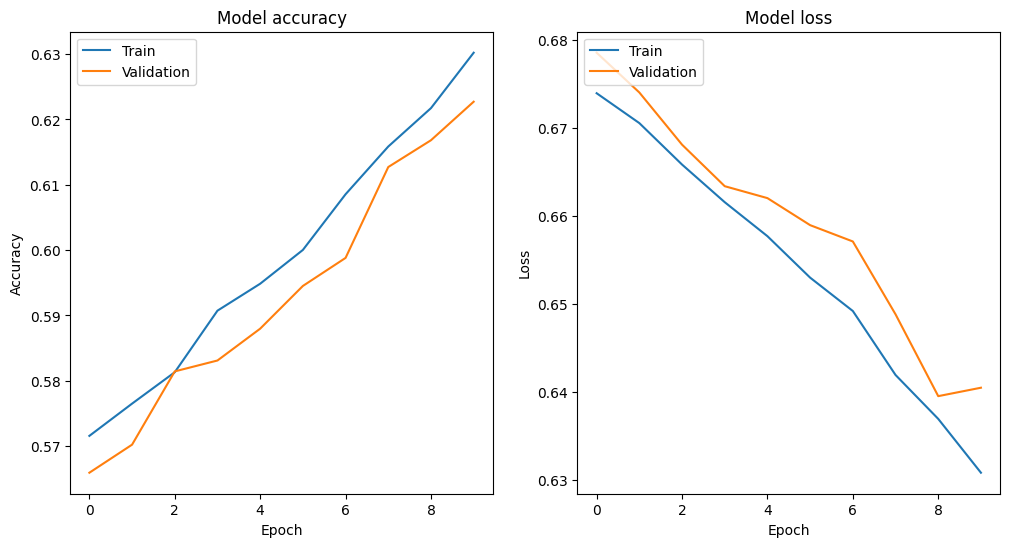

In [9]:
import matplotlib.pyplot as plt

# Train the model and store the training history
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Plot training history
def plot_history(history):
    plt.figure(figsize=(12, 6))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

# Call the function to plot the history
plot_history(history)


# **Confusion matrix**

488/488 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step
Accuracy: 0.6214
Sensitivity (Recall): 0.7082
Specificity: 0.5371
Precision: 0.5978
F-measure (F1-score): 0.6484


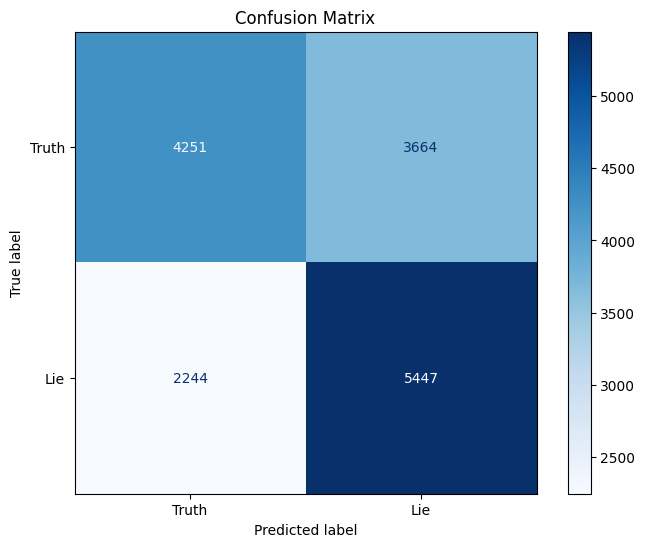

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming X_test and y_test are your test datasets

# Generate predictions
y_pred = model.predict(X_test)

# Convert predictions to binary labels
y_pred_binary = (y_pred >= 0.5).astype(int).flatten()

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Extracting TN, FP, FN, TP from the confusion matrix
TN, FP, FN, TP = cm.ravel()

# Compute metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)
sensitivity = TP / (TP + FN)  # also known as recall
specificity = TN / (TN + FP)
precision = TP / (TP + FP)
f_measure = 2 * (precision * sensitivity) / (precision + sensitivity)  # F1-score

# Display metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F-measure (F1-score): {f_measure:.4f}")

# Optionally, plot the confusion matrix for better visualization
def plot_confusion_matrix(cm, class_names):
    fig, ax = plt.subplots(figsize=(8, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues, ax=ax)
    plt.title('Confusion Matrix')
    plt.show()

# Define class names
class_names = ['Truth', 'Lie']

# Call the function to plot the confusion matrix
plot_confusion_matrix(cm, class_names)


# **ROC curve**

488/488 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step


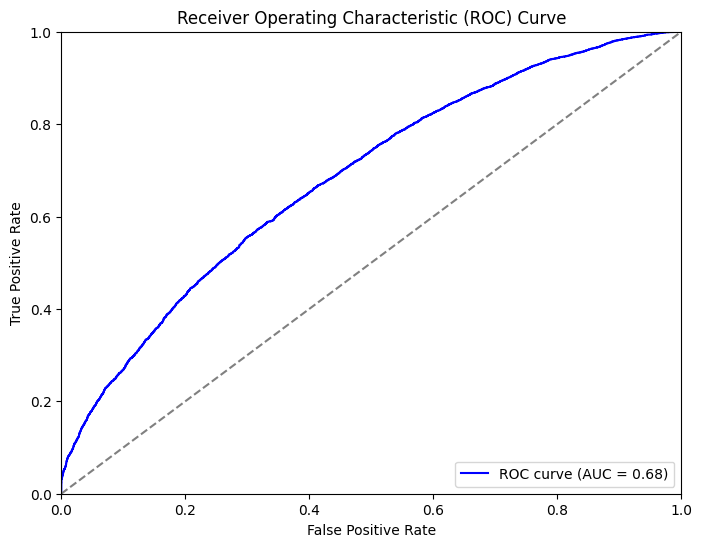

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming X_test and y_test are your test datasets

# Generate predicted probabilities
y_pred_prob = model.predict(X_test)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
